In [218]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

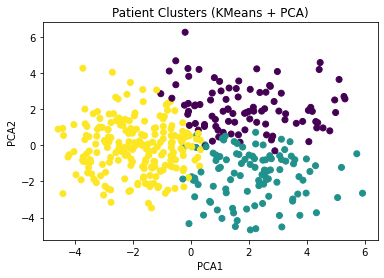

In [287]:
cdata = pd.read_csv("complete_data.csv")
# Sample setup
# features = ['Age', 'BMI', 'Sex', 'Height', 'Weight', 'Alvarado_Score',
#        'Paedriatic_Appendicitis_Score', 'Migratory_Pain',
#        'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
#        'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Body_Temperature',
#        'WBC_Count', 'Neutrophil_Percentage', 'Neutrophilia', 'RBC_Count',
#        'Hemoglobin', 'RDW', 'Thrombocyte_Count', 'Ketones_in_Urine',
#        'RBC_in_Urine', 'WBC_in_Urine']
# Subset the data
features = ['Age', 'BMI', 'Sex', 'Height', 'Weight',
       'Alvarado_Score',
       'Paedriatic_Appendicitis_Score',
       'Migratory_Pain', 'Lower_Right_Abd_Pain',
       'Contralateral_Rebound_Tenderness', 'Coughing_Pain', 'Nausea',
       'Loss_of_Appetite', 'Body_Temperature', 'WBC_Count',
       'Neutrophil_Percentage', 'Neutrophilia',
       'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
       'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'Peritonitis',
       'Ipsilateral_Rebound_Tenderness', 'Migratory_Pain', 'Coughing_Pain',
       'Nausea']
df_cluster = cdata[features].dropna()

# One-hot encode categorical columns
df_cluster_encoded = pd.get_dummies(df_cluster, columns=['Sex', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
    'Coughing_Pain', 'Nausea', 'Loss_of_Appetite', 'Neutrophilia', 'Ketones_in_Urine',
    'RBC_in_Urine', 'WBC_in_Urine', 'Peritonitis', 'Ipsilateral_Rebound_Tenderness'], drop_first=True)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_encoded)

# Cluster
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Patient Clusters (KMeans + PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [289]:
# Add cluster labels back to the dataframe
df_cluster['Cluster'] = clusters

# Add Diagnosis or other original labels for comparison
df_cluster['Diagnosis'] = cdata.loc[df_cluster.index, 'Diagnosis']


In [291]:
pd.crosstab(df_cluster['Cluster'], df_cluster['Diagnosis'])


Diagnosis,0,1
Cluster,,
0,31,62
1,49,55
2,142,69


In [293]:
# Add cluster labels back to the original unencoded dataframe
df_cluster['Cluster'] = clusters

# Select the columns you used for clustering + the cluster label
features = ['Age', 'BMI', 'Height', 'Weight', 'Alvarado_Score',
            'Paedriatic_Appendicitis_Score', 'Body_Temperature',
            'WBC_Count', 'Neutrophil_Percentage', 'Neutrophilia',
            'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
            'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine']

# Include the categorical binary features too
binary_features = ['Sex_Male', 'Migratory_Pain_Yes', 'Lower_Right_Abd_Pain_Yes',
                   'Contralateral_Rebound_Tenderness_Yes', 'Coughing_Pain_Yes',
                   'Nausea_Yes', 'Loss_of_Appetite_Yes']

# Add cluster labels to the one-hot encoded dataframe
df_cluster_encoded['Cluster'] = clusters

# Group by cluster and get the mean of all features
cluster_profiles = df_cluster_encoded.groupby('Cluster').mean()

# Round for readability
cluster_profiles = cluster_profiles.round(2)

# Display the profile
print(cluster_profiles.T)  # Transpose for better readability (features as rows)


# Display
print(cluster_profiles)


Cluster                                    0       1       2
Age                                    12.86    8.66   12.55
BMI                                    20.28   16.42   19.96
Height                                155.72  133.40  154.33
Weight                                 50.05   30.17   48.49
Alvarado_Score                          7.62    6.88    4.10
Paedriatic_Appendicitis_Score           7.13    5.61    3.77
Body_Temperature                       37.56   37.78   36.99
WBC_Count                              13.52   15.94    8.93
Neutrophil_Percentage                  77.00   81.68   58.90
RBC_Count                               4.88    4.83    4.81
Hemoglobin                             13.57   12.98   13.59
RDW                                    13.04   14.32   12.76
Thrombocyte_Count                     274.92  306.70  274.42
Sex_male                                0.47    0.62    0.41
Migratory_Pain_yes                      0.71    0.07    0.22
Migratory_Pain_yes      

In [295]:
cluster_profiles.loc[0].sort_values(ascending=False)  # Cluster 0 top features

Thrombocyte_Count                       274.92
Height                                  155.72
Neutrophil_Percentage                    77.00
Weight                                   50.05
Body_Temperature                         37.56
BMI                                      20.28
Hemoglobin                               13.57
WBC_Count                                13.52
RDW                                      13.04
Age                                      12.86
Alvarado_Score                            7.62
Paedriatic_Appendicitis_Score             7.13
RBC_Count                                 4.88
Lower_Right_Abd_Pain_yes                  0.99
Nausea_yes                                0.86
Nausea_yes                                0.86
Migratory_Pain_yes                        0.71
Migratory_Pain_yes                        0.71
Neutrophilia_1                            0.70
Loss_of_Appetite_yes                      0.60
Coughing_Pain_yes                         0.57
Coughing_Pain

In [297]:
data_ml = df_cluster_encoded.copy()

# Add back the 'Diagnosis' column from the original data (must align in index)
data_ml['Diagnosis'] = df_cluster['Diagnosis'].values

# Split features and target
X = data_ml.drop(columns='Diagnosis')
y = data_ml['Diagnosis'].astype(int)

# Check
print(X.shape, y.shape)
print(y.value_counts())


(408, 33) (408,)
0    222
1    186
Name: Diagnosis, dtype: int64


In [299]:
# Clean/prep data
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

# Ensure data types and shapes are correct
X_train = X_train.astype(float)
X_val = X_val.astype(float)
y_train = y_train.ravel()
y_val = y_val.ravel()


Model: Logistic Regression
Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}
Accuracy: 0.7073170731707317
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76        45
           1       0.72      0.57      0.64        37

    accuracy                           0.71        82
   macro avg       0.71      0.69      0.70        82
weighted avg       0.71      0.71      0.70        82



/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jonathonhellner/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


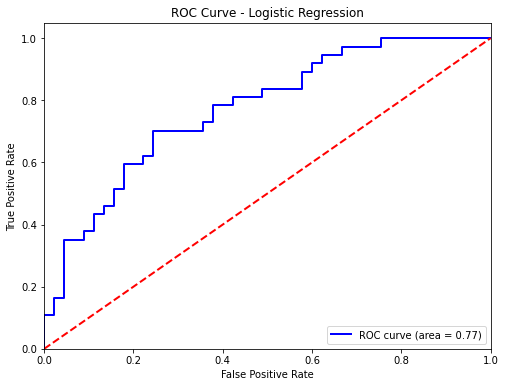

Model: Random Forest
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
Accuracy: 0.7439024390243902
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        45
           1       0.74      0.68      0.70        37

    accuracy                           0.74        82
   macro avg       0.74      0.74      0.74        82
weighted avg       0.74      0.74      0.74        82



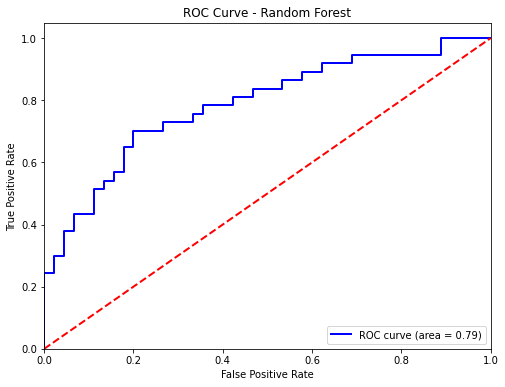

Model: Gradient Boosting
Best parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy: 0.6707317073170732
Classification report:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        45
           1       0.67      0.54      0.60        37

    accuracy                           0.67        82
   macro avg       0.67      0.66      0.66        82
weighted avg       0.67      0.67      0.67        82



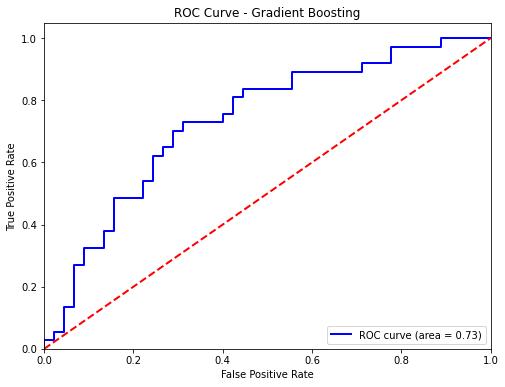

Model: XGBoost
Best parameters: {'max_depth': 3, 'learning_rate': 0.01}
Accuracy: 0.6463414634146342
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69        45
           1       0.62      0.54      0.58        37

    accuracy                           0.65        82
   macro avg       0.64      0.64      0.64        82
weighted avg       0.64      0.65      0.64        82



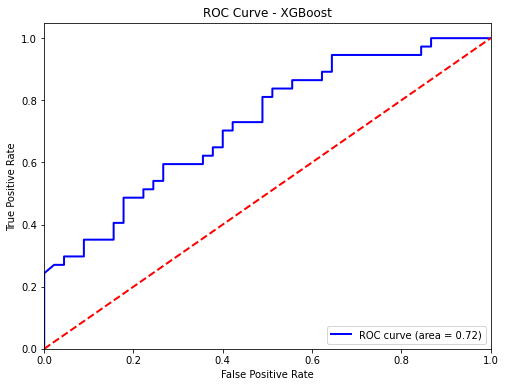

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier())
]

for name, model in models:
    param_distributions = {}
    if name == "Logistic Regression":
        param_distributions = {
"C": [0.001, 0.01, 0.1, 1, 10, 100],
            "penalty": ["l1", "l2", "elasticnet"],
            "solver": ["liblinear", "saga", "newton-cg"]
        }
    elif name == "Random Forest":
        param_distributions = {
            "n_estimators": [100, 200, 300, 400],
            "max_depth": [None, 10, 20, 30, 50],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "bootstrap": [True, False]
        }
    elif name == "Gradient Boosting":
        param_distributions = {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 4, 5]
        }
    elif name == "XGBoost":
        param_distributions = {
            "max_depth": [3, 4, 5],
            "learning_rate": [0.01, 0.1]
        }

    randomized_search = RandomizedSearchCV(
        model,
        param_distributions,
        cv=3,
        scoring="roc_auc",
        verbose=0,
        n_jobs=3
    )

    randomized_search.fit(X_train, y_train)
    best_model = randomized_search.best_estimator_
    y_pred = best_model.predict(X_val)

    print("Model:", name)
    print("Best parameters:", randomized_search.best_params_)
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification report:\n", classification_report(y_val, y_pred))

    # ROC Curve
    if hasattr(best_model, "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
        roc_auc = roc_auc_score(y_val, y_pred_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
        plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()


In [303]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the model
model = xgb.XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Implement Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END 

In [251]:
!pip install xgboost